# Data Generation

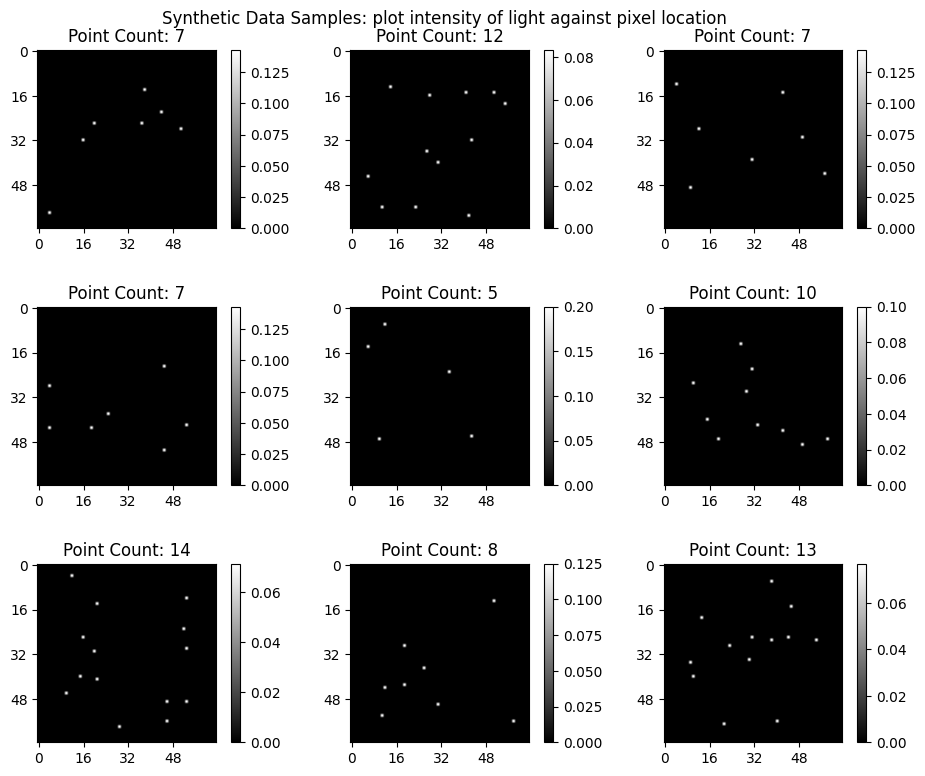

In [4]:
# Data Generation
from vanillanet.data import DiscretePointsDataset
from vanillanet.metrics import _normalize_intensity
import numpy as np
import matplotlib.pyplot as plt
import torch

plot_data = DiscretePointsDataset(num_samples=9, size=64, min_points=5, max_points=15, min_distance = 5, border = 4)

# Visualize the data
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.suptitle('Synthetic Data Samples: plot intensity of light against pixel location')
    normalized_data = _normalize_intensity(plot_data[i].unsqueeze(0))
    data_tensor = torch.from_numpy(normalized_data.squeeze(0).squeeze(0).numpy())
    im = plt.imshow(data_tensor, cmap='gray')
    plt.title(f'Point Count: {plot_data.get_point_count(i)}')
    
    # plt.xlabel('X (pixels)')
    # plt.ylabel('Y (pixels)')
    plt.xticks(np.arange(0, 64, 16))  # Show every 16th pixel
    plt.yticks(np.arange(0, 64, 16))  # Show every 16th pixel

        # Adjust spacing to prevent title overlap
    plt.tight_layout(pad=2.0)  # Add padding between subplots
    plt.subplots_adjust(top=0.93)  # Make room for the main title

    plt.colorbar(im, ax=plt.gca())
plt.savefig('images/synthetic_data_samples.png', bbox_inches='tight')

# Neural Network

TODO: Would be nice to change train_model to take in different models (not just VanillaNet which is currently hardcoded)

Training samples: 800, Validation samples: 200
Training Epoch 1


Epoch 1: 100%|██████████| 25/25 [00:06<00:00,  3.85it/s]


  Val breakdown: Inefficiency=0.202301, Non-uniformity=0.104045, Total=10404460.280000
Epoch [1/10] - Train Loss: 23737953.6000 - Val Loss: 10404460.2800 - LR: 0.001000
  -> New best validation loss: 10404460.2800
Training Epoch 2


Epoch 2: 100%|██████████| 25/25 [00:03<00:00,  6.87it/s]


  Val breakdown: Inefficiency=0.202335, Non-uniformity=0.049049, Total=4904906.980000
Epoch [2/10] - Train Loss: 9261432.5800 - Val Loss: 4904906.9800 - LR: 0.001000
  -> New best validation loss: 4904906.9800
Training Epoch 3


Epoch 3: 100%|██████████| 25/25 [00:03<00:00,  7.41it/s]


  Val breakdown: Inefficiency=0.202314, Non-uniformity=0.044389, Total=4438935.500000
Epoch [3/10] - Train Loss: 4717914.6700 - Val Loss: 4438935.5000 - LR: 0.001000
  -> New best validation loss: 4438935.5000
Training Epoch 4


Epoch 4: 100%|██████████| 25/25 [00:02<00:00,  8.53it/s]


  Val breakdown: Inefficiency=0.202329, Non-uniformity=0.037942, Total=3794162.800000
Epoch [4/10] - Train Loss: 3277172.9800 - Val Loss: 3794162.8000 - LR: 0.000500
  -> New best validation loss: 3794162.8000
Training Epoch 5


Epoch 5: 100%|██████████| 25/25 [00:02<00:00,  9.45it/s]


  Val breakdown: Inefficiency=0.202316, Non-uniformity=0.036892, Total=3689219.860000
Epoch [5/10] - Train Loss: 2411497.0500 - Val Loss: 3689219.8600 - LR: 0.000500
  -> New best validation loss: 3689219.8600
Training Epoch 6


Epoch 6: 100%|██████████| 25/25 [00:02<00:00,  9.23it/s]


  Val breakdown: Inefficiency=0.202311, Non-uniformity=0.035977, Total=3597682.130000
Epoch [6/10] - Train Loss: 1980516.2000 - Val Loss: 3597682.1300 - LR: 0.000500
  -> New best validation loss: 3597682.1300
Training Epoch 7


Epoch 7: 100%|██████████| 25/25 [00:02<00:00,  9.69it/s]


  Val breakdown: Inefficiency=0.202325, Non-uniformity=0.034494, Total=3449357.750000
Epoch [7/10] - Train Loss: 1548016.8750 - Val Loss: 3449357.7500 - LR: 0.000250
  -> New best validation loss: 3449357.7500
Training Epoch 8


Epoch 8: 100%|██████████| 25/25 [00:03<00:00,  7.25it/s]


  Val breakdown: Inefficiency=0.202322, Non-uniformity=0.034498, Total=3449801.570000
Epoch [8/10] - Train Loss: 1158745.6925 - Val Loss: 3449801.5700 - LR: 0.000250
  -> No improvement for 1 epochs
Training Epoch 9


Epoch 9: 100%|██████████| 25/25 [00:02<00:00,  9.63it/s]


  Val breakdown: Inefficiency=0.202326, Non-uniformity=0.034296, Total=3429553.720000
Epoch [9/10] - Train Loss: 966476.2375 - Val Loss: 3429553.7200 - LR: 0.000250
  -> New best validation loss: 3429553.7200
Training Epoch 10


Epoch 10: 100%|██████████| 25/25 [00:03<00:00,  7.08it/s]


  Val breakdown: Inefficiency=0.202324, Non-uniformity=0.034165, Total=3416475.420000
Epoch [10/10] - Train Loss: 805222.8350 - Val Loss: 3416475.4200 - LR: 0.000125
  -> New best validation loss: 3416475.4200
Training complete.
Best validation loss: 3416475.4200


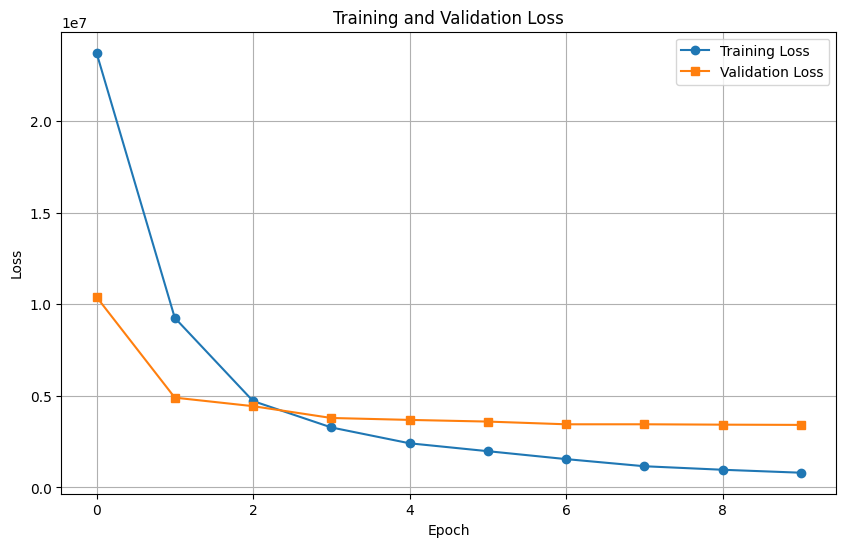

<Figure size 640x480 with 0 Axes>

In [6]:
from vanillanet.neural_net import train_model
from vanillanet.data import DiscretePointsDataset
from matplotlib import pyplot as plt

model, device, dataset, train_losses, val_losses = train_model(num_epochs = 10, lr = 1e-3, size = 64, batch_size=32,
                dataset = DiscretePointsDataset(num_samples=1000, size=64, min_points=5, max_points=15, min_distance = 5, border = 4))

# Plot training curves
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('images/training_and_validation_loss.png', bbox_inches='tight')

In [6]:
import torch

In [7]:
torch.save(model.state_dict(), 'models/model1.pth')

In [10]:
model.load_state_dict(torch.load('models/model1.pth'))

<All keys matched successfully>

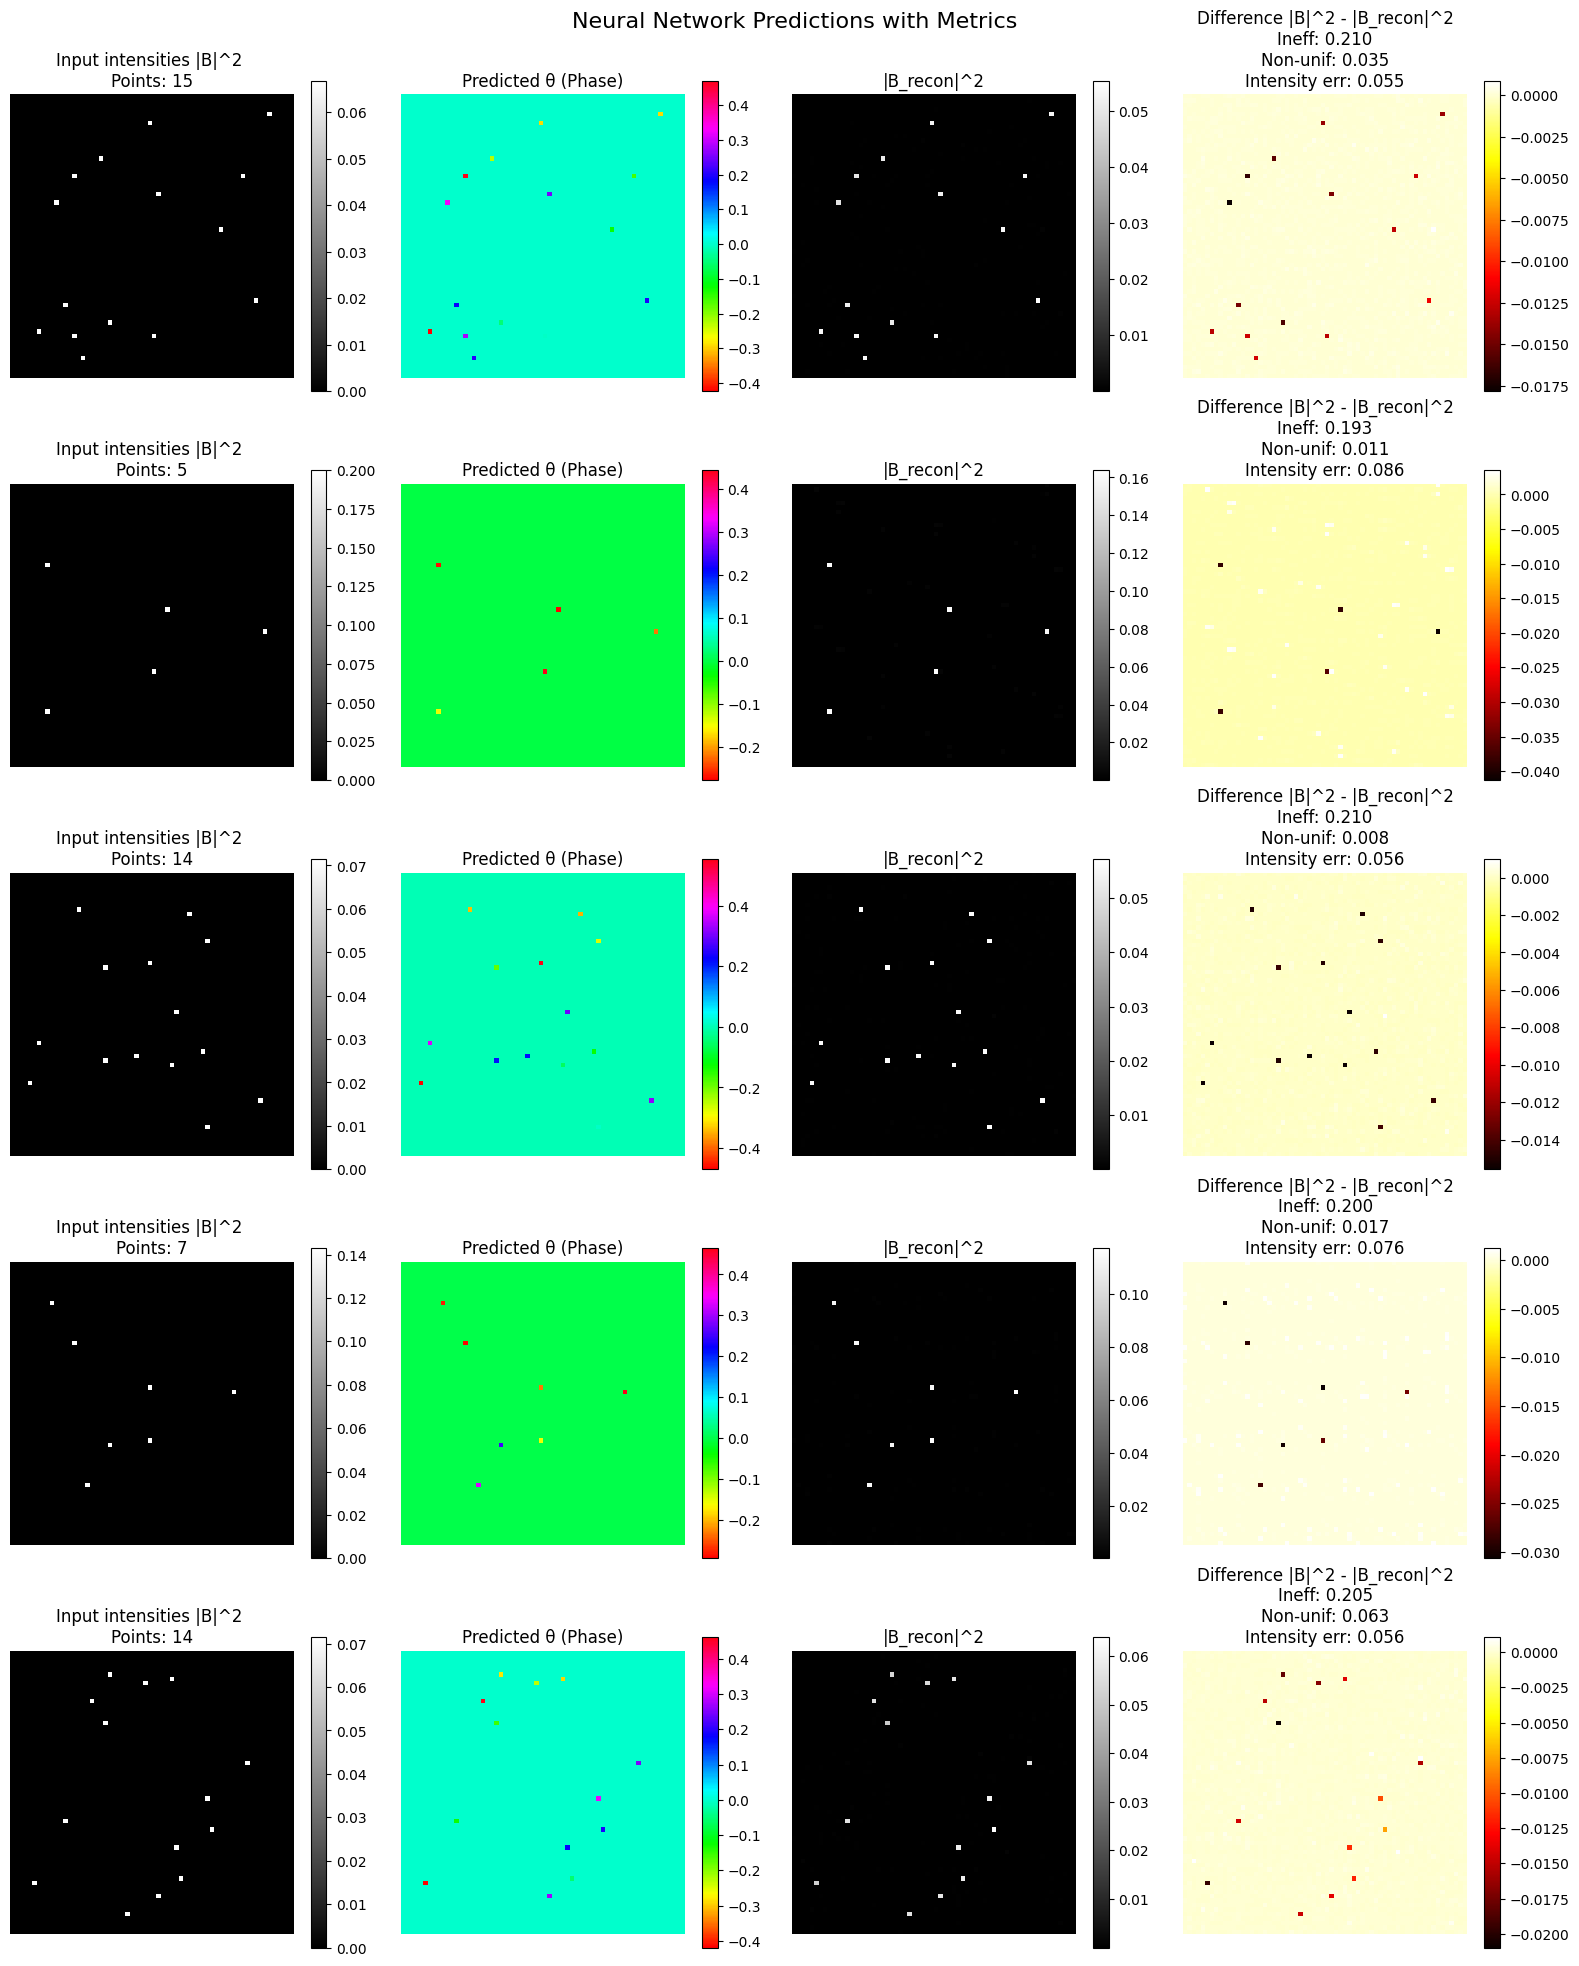

In [3]:
from vanillanet.neural_net import visualize_results_with_metrics
visualize_results_with_metrics(model, dataset, device, num_samples=5, debug = False)

# Gradient Descent (sparse representation)


--- Processing Sample 1/5 (Index 77) ---
Target points: 7.0
Inefficiency requires_grad: True
Non_uniformity requires_grad: True


/Users/qugao/Documents/ETH Zurich/SemesterProjectFS2025/qugao_computer_holography/.venv/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



--- Processing Sample 2/5 (Index 90) ---
Target points: 7.0
Inefficiency requires_grad: True
Non_uniformity requires_grad: True

--- Processing Sample 3/5 (Index 25) ---
Target points: 15.0
Inefficiency requires_grad: True
Non_uniformity requires_grad: True

--- Processing Sample 4/5 (Index 70) ---
Target points: 11.0
Inefficiency requires_grad: True
Non_uniformity requires_grad: True

--- Processing Sample 5/5 (Index 29) ---
Target points: 8.0
Inefficiency requires_grad: True
Non_uniformity requires_grad: True


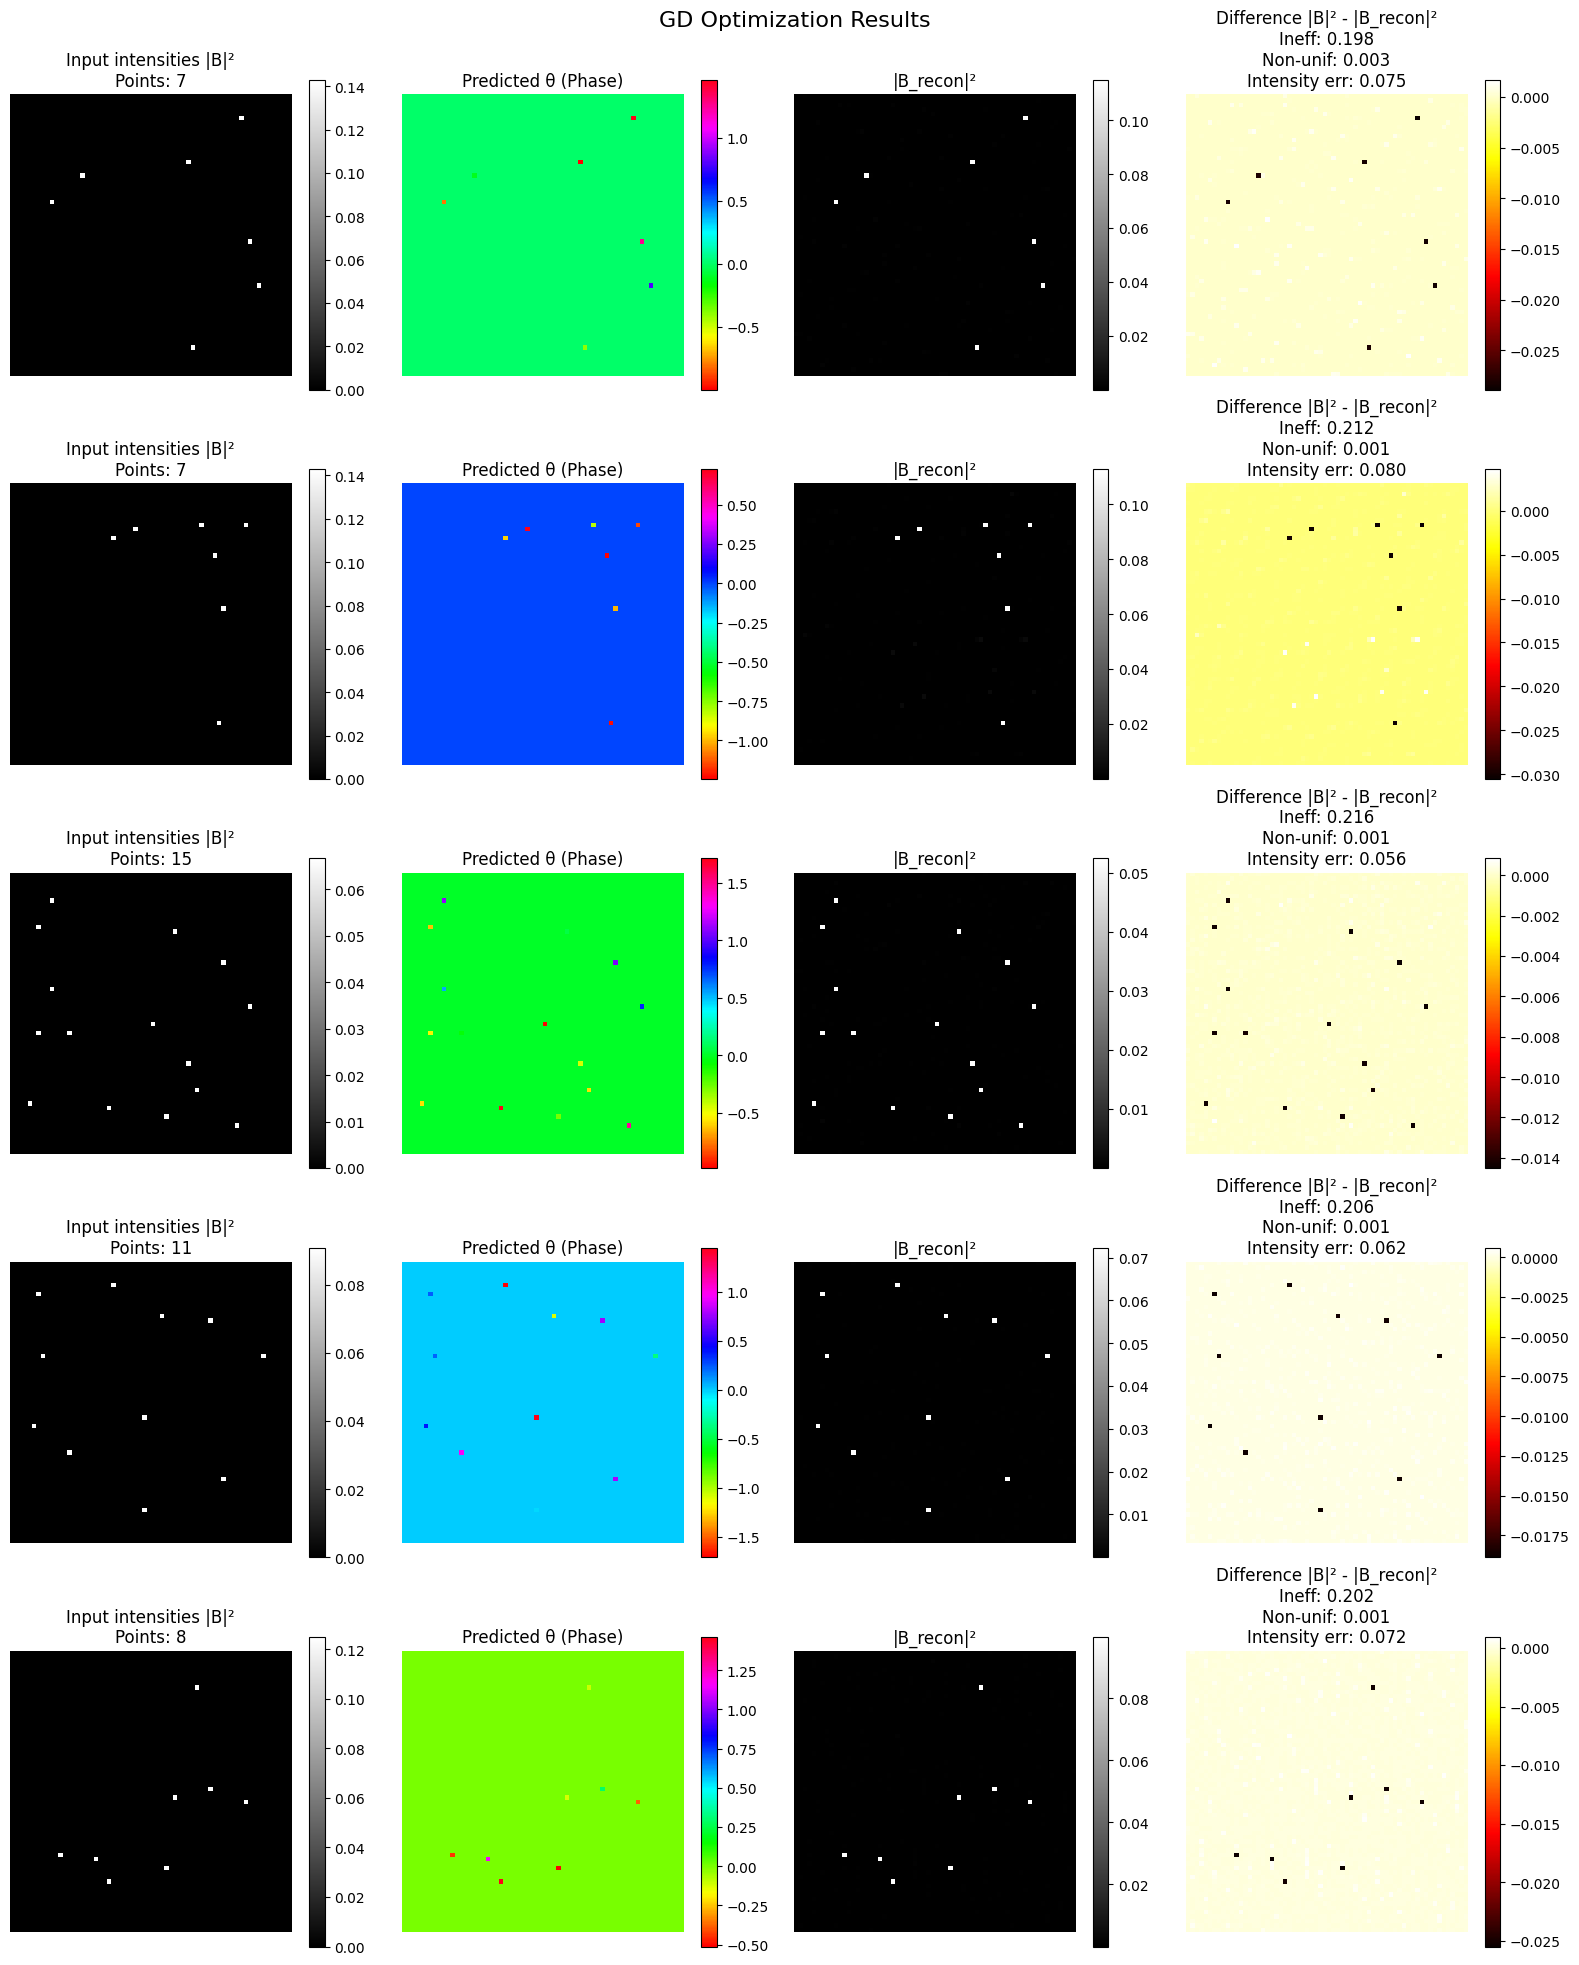


GD OPTIMIZATION RESULTS SUMMARY
Sample       Index  Points Efficiency Ineff    Non-unif Amp err  Final Loss
--------------------------------------------------------------------------------
sample_0     77     7      0.8017     0.198    0.003    0.075    4.3136    
sample_1     90     7      0.7878     0.212    0.001    0.080    1.7729    
sample_2     25     15     0.7844     0.216    0.001    0.056    1.5559    
sample_3     70     11     0.7942     0.206    0.001    0.062    1.1808    
sample_4     29     8      0.7977     0.202    0.001    0.072    1.8350    
--------------------------------------------------------------------------------
AVERAGE                    0.7932     0.207    0.002    0.069    2.1316    


In [5]:
from vanillanet.grad_des import visualize_gd_results_with_metrics
from vanillanet.data import DiscretePointsDataset
from vanillanet.device import get_device

device = get_device()

all_metrics, all_results = visualize_gd_results_with_metrics(
    dataset=DiscretePointsDataset(num_samples=100, size=64, min_points=5, max_points=15),
    device=device,
    num_samples=5,
    save_path='images/GD_sample_predictions.png',
    show_metrics=True,
    debug=False,
    iterations=1000,
    lr=0.01,
    verbose=True,
    var_cost = 1000, 
    show_loss_plot=False
)

# Gradient Descent (full representation)

# Gerchberg Saxton (Standard and Weighted)

Testing GS algorithm on 5 samples...
Using device: cpu

--- Sample 1 ---
Weighted GS quality requirements:
  Inefficiency must be < 0.3
  Non-uniformity must be < 0.1
Iteration 1: Waiting for stability...
  Inefficiency change: inf (need < 1e-06)
  Non-uniformity change: inf (need < 1e-06)
Iteration 1/100
  MSE Error: 4095.691895
  Inefficiency: 0.997315
  Non-uniformity: 0.589511
Iteration 11/100
  MSE Error: 4090.321045
  Inefficiency: 0.193138
  Non-uniformity: 0.000193
Iteration 21/100
  MSE Error: 4090.320801
  Inefficiency: 0.193034
  Non-uniformity: 0.000139
Iteration 31/100
  MSE Error: 4090.320801
  Inefficiency: 0.192968
  Non-uniformity: 0.000140
Iteration 41/100
  MSE Error: 4090.320312
  Inefficiency: 0.192924
  Non-uniformity: 0.000120
Iteration 51: Waiting for stability...
  Inefficiency change: 0.00000238 (need < 1e-06)
  Non-uniformity change: 0.00000044 (need < 1e-06)
Iteration 51/100
  MSE Error: 4090.320312
  Inefficiency: 0.192896
  Non-uniformity: 0.000106
Iterati

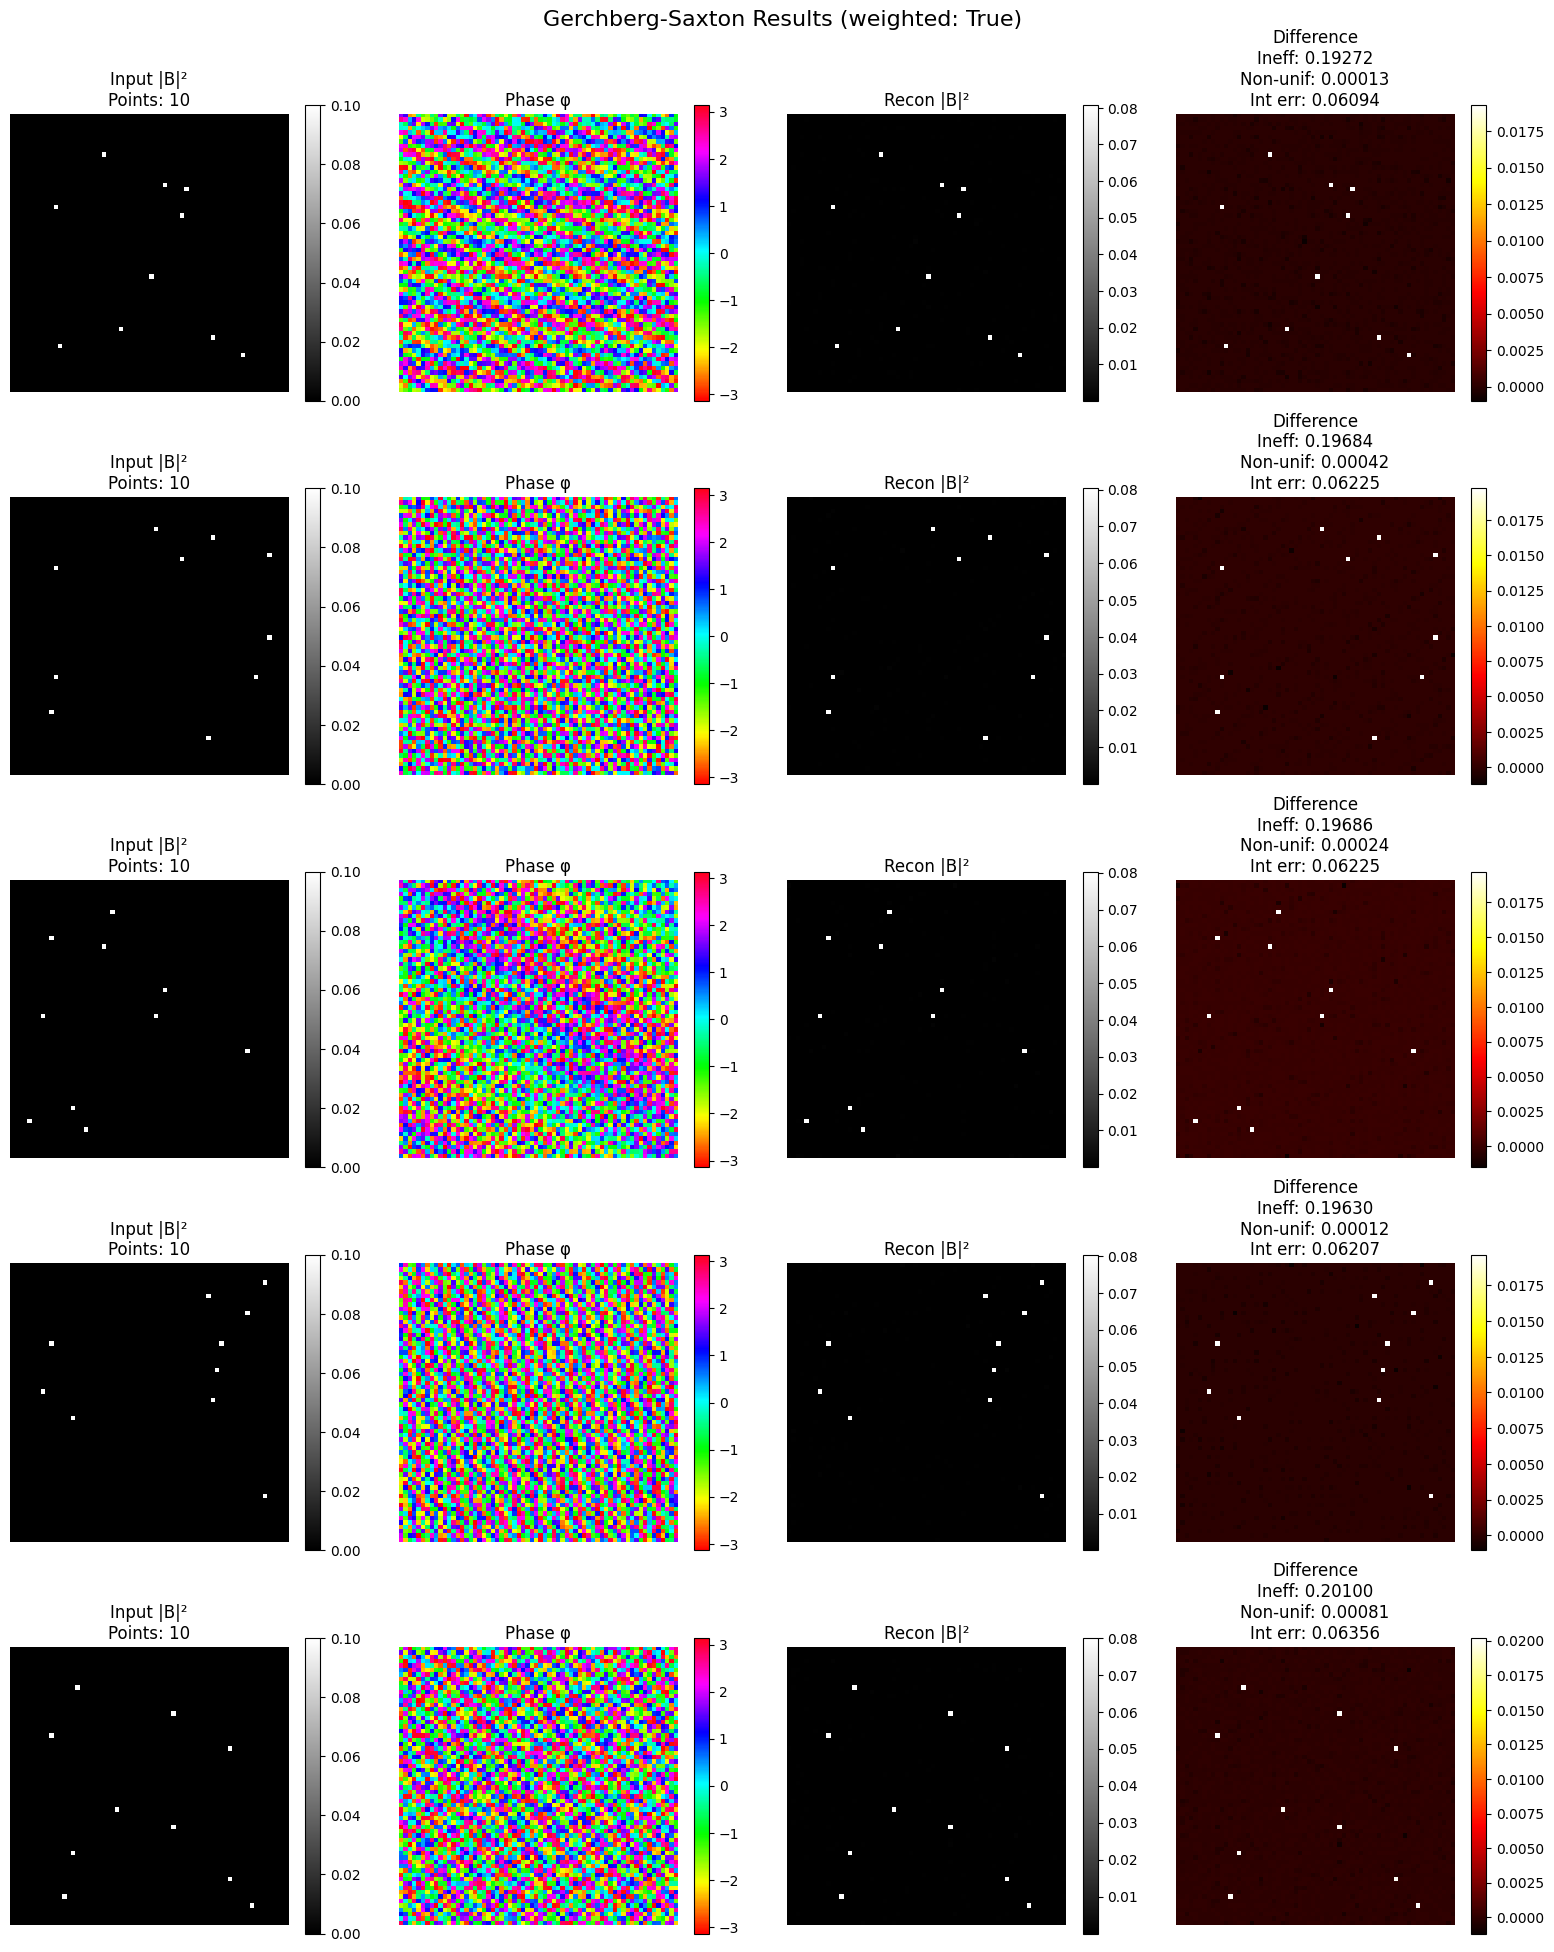


GS Algorithm Results Summary:
Weighted: True
Sample   Points Ineff    Non-unif Intensity err
--------------------------------------------------
Sample 1  10     0.193    0.000    0.061   
Sample 2  10     0.197    0.000    0.062   
Sample 3  10     0.197    0.000    0.062   
Sample 4  10     0.196    0.000    0.062   
Sample 5  10     0.201    0.001    0.064   


In [8]:
from vanillanet.gs import test_gerchberg_saxton

weighted_results = test_gerchberg_saxton(debug = False, weighted=True, num_iterations = 100, num_samples = 5)

Testing GS algorithm on 15 samples...
Using device: cpu

--- Sample 1 ---
Iteration 1/100
  MSE Error: 4095.814209
  Inefficiency: 0.999021
  Non-uniformity: 0.600986
Iteration 11/100
  MSE Error: 4090.333740
  Inefficiency: 0.196425
  Non-uniformity: 0.036792
Iteration 21/100
  MSE Error: 4090.329834
  Inefficiency: 0.195318
  Non-uniformity: 0.037751
Iteration 31/100
  MSE Error: 4090.328857
  Inefficiency: 0.195139
  Non-uniformity: 0.037818
Iteration 41/100
  MSE Error: 4090.328613
  Inefficiency: 0.195079
  Non-uniformity: 0.038853
Iteration 51/100
  MSE Error: 4090.329102
  Inefficiency: 0.195047
  Non-uniformity: 0.039314
Iteration 61/100
  MSE Error: 4090.328613
  Inefficiency: 0.195033
  Non-uniformity: 0.039205
Iteration 71/100
  MSE Error: 4090.328857
  Inefficiency: 0.195026
  Non-uniformity: 0.039164
Standard GS converged after 74 iterations
Final inefficiency: 0.195025 (change: 0.00000030)
Final non-uniformity: 0.039160 (change: 0.00000062)
Inefficiency: 0.1950
Non-unifor

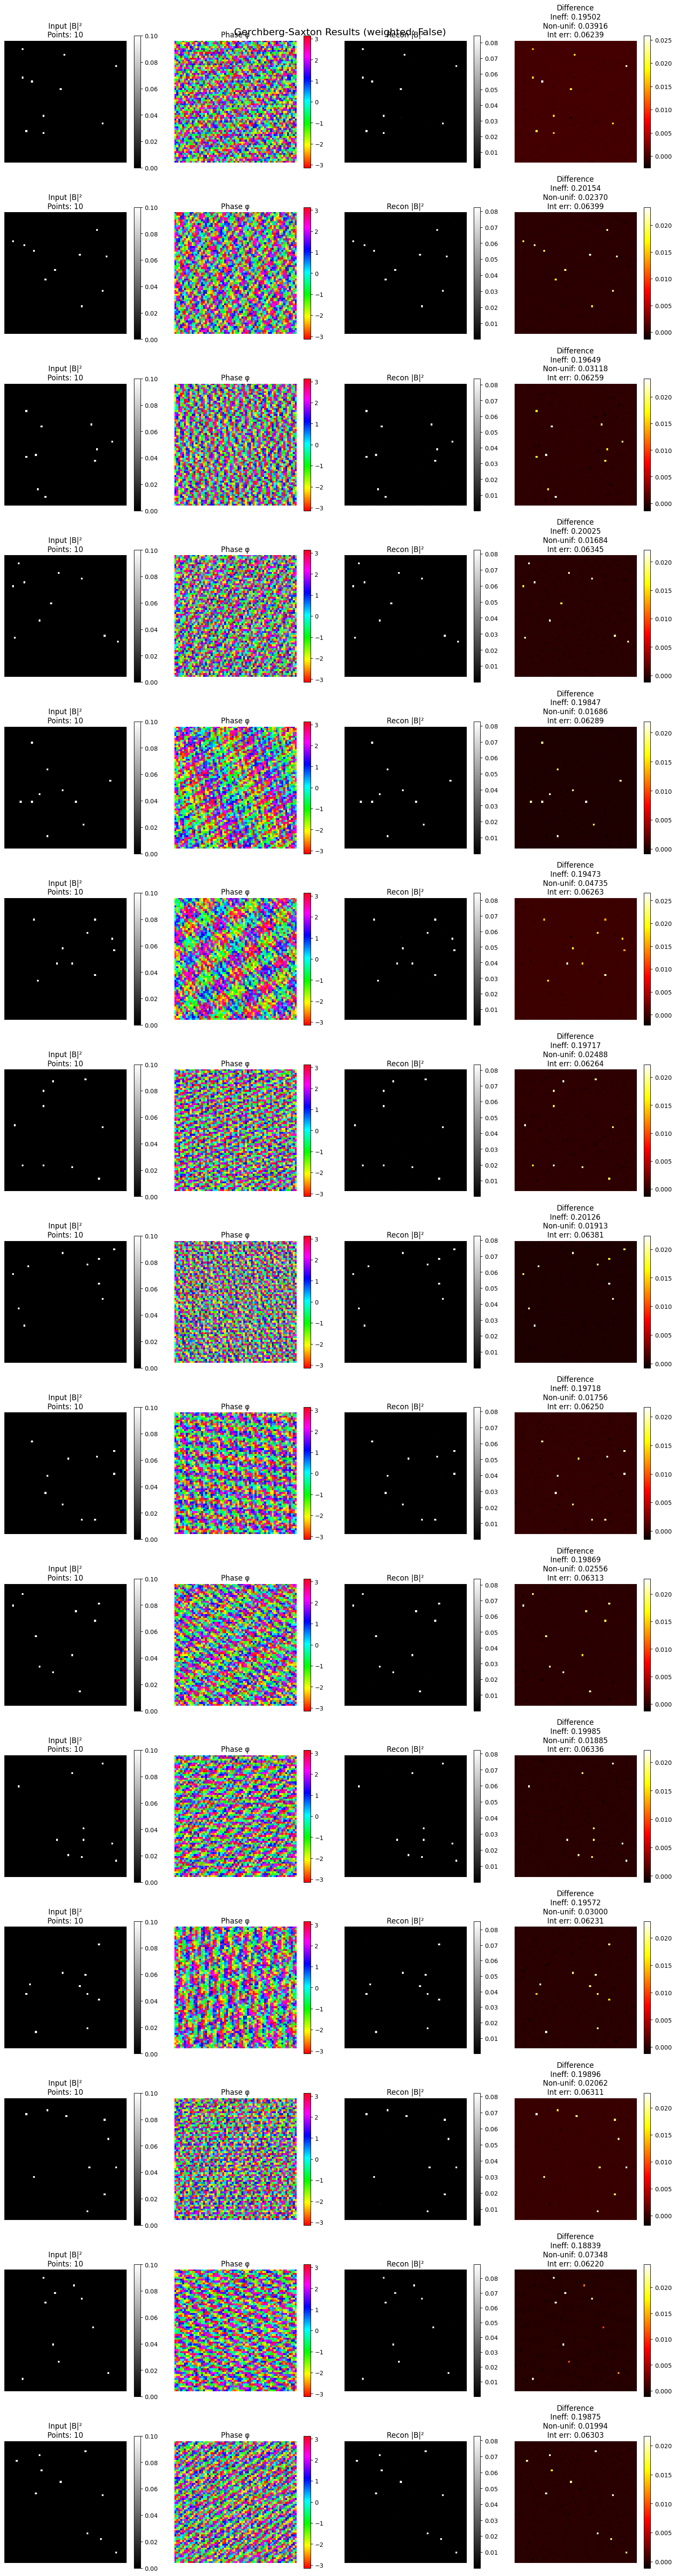


GS Algorithm Results Summary:
Weighted: False
Sample   Points Ineff    Non-unif Intensity err
--------------------------------------------------
Sample 1  10     0.195    0.039    0.062   
Sample 2  10     0.202    0.024    0.064   
Sample 3  10     0.196    0.031    0.063   
Sample 4  10     0.200    0.017    0.063   
Sample 5  10     0.198    0.017    0.063   
Sample 6  10     0.195    0.047    0.063   
Sample 7  10     0.197    0.025    0.063   
Sample 8  10     0.201    0.019    0.064   
Sample 9  10     0.197    0.018    0.062   
Sample 10 10     0.199    0.026    0.063   
Sample 11 10     0.200    0.019    0.063   
Sample 12 10     0.196    0.030    0.062   
Sample 13 10     0.199    0.021    0.063   
Sample 14 10     0.188    0.073    0.062   
Sample 15 10     0.199    0.020    0.063   


In [7]:
non_weighted_results = test_gerchberg_saxton(debug = False, weighted=False, num_iterations = 100, num_samples = 15)

# 4 Way Comparison 

Starting comprehensive 4-way comparison of all methods...
⚠️  Device mismatch detected!
   Model is on: mps:0
   Requested device: mps
   Moving model to mps...
Comparing all methods on 10 samples...
Using device: mps
Model device: mps:0

--- Sample 1 (Index 143) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.768555
  Inefficiency: 0.998115
  Non-uniformity: 0.574090
Iteration 11/2000
  MSE Error: 4090.942871
  Inefficiency: 0.199966
  Non-uniformity: 0.021051
Iteration 21/2000
  MSE Error: 4090.939453
  Inefficiency: 0.199033
  Non-uniformity: 0.019364
Iteration 31/2000
  MSE Error: 4090.938965
  Inefficiency: 0.198631
  Non-uniformity: 0.017715
Iteration 41/2000
  MSE Error: 4090.937988
  Inefficiency: 0.198524
  Non-uniformity: 0.017550
Iteration 51/2000
  MSE Error: 4090.937988
  Inefficiency: 0.198439
  Non-uniformity: 0.018874
Iteration 61/2000
  MSE Error: 4090.937500
  Inefficiency: 0.198347
  Non-uniformity: 0.019933
Iteration 71/2000
  MSE Error

/Users/qugao/Documents/ETH Zurich/SemesterProjectFS2025/qugao_computer_holography/.venv/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


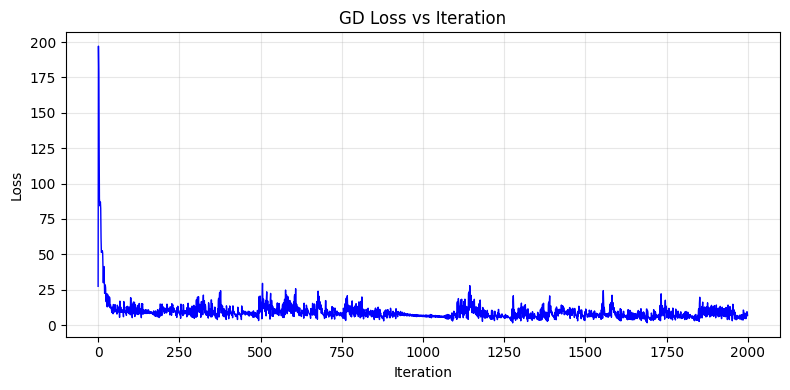

Loss decreased from 27.367767 to 6.891074
Total improvement: 74.82%
Running Neural Network...

--- Sample 2 (Index 796) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.802734
  Inefficiency: 0.998125
  Non-uniformity: 0.720534
Iteration 11/2000
  MSE Error: 4091.609863
  Inefficiency: 0.196140
  Non-uniformity: 0.013232
Iteration 21/2000
  MSE Error: 4091.608398
  Inefficiency: 0.195671
  Non-uniformity: 0.018285
Iteration 31/2000
  MSE Error: 4091.608154
  Inefficiency: 0.195559
  Non-uniformity: 0.019565
Iteration 41/2000
  MSE Error: 4091.608398
  Inefficiency: 0.195536
  Non-uniformity: 0.020434
Iteration 51/2000
  MSE Error: 4091.608398
  Inefficiency: 0.195528
  Non-uniformity: 0.020844
Iteration 61/2000
  MSE Error: 4091.607910
  Inefficiency: 0.195525
  Non-uniformity: 0.021045
Iteration 71/2000
  MSE Error: 4091.608154
  Inefficiency: 0.195524
  Non-uniformity: 0.021139
Iteration 81/2000
  MSE Error: 4091.608398
  Inefficiency: 0.195523
  Non-unif

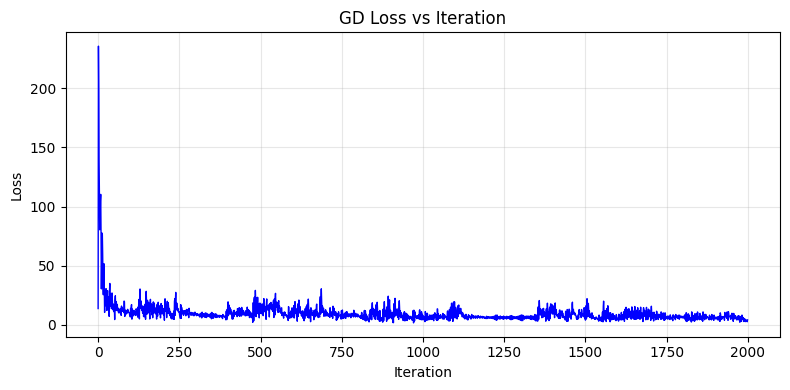

Loss decreased from 13.804455 to 4.202813
Total improvement: 69.55%
Running Neural Network...

--- Sample 3 (Index 463) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.645996
  Inefficiency: 0.995999
  Non-uniformity: 1.285394
Iteration 11/2000
  MSE Error: 4090.066895
  Inefficiency: 0.198925
  Non-uniformity: 0.039375
Iteration 21/2000
  MSE Error: 4090.063477
  Inefficiency: 0.197909
  Non-uniformity: 0.045893
Iteration 31/2000
  MSE Error: 4090.059082
  Inefficiency: 0.196687
  Non-uniformity: 0.048513
Iteration 41/2000
  MSE Error: 4090.057373
  Inefficiency: 0.196162
  Non-uniformity: 0.047112
Iteration 51/2000
  MSE Error: 4090.055908
  Inefficiency: 0.195923
  Non-uniformity: 0.040132
Iteration 61/2000
  MSE Error: 4090.055176
  Inefficiency: 0.195757
  Non-uniformity: 0.034589
Iteration 71/2000
  MSE Error: 4090.054688
  Inefficiency: 0.195676
  Non-uniformity: 0.030547
Iteration 81/2000
  MSE Error: 4090.054688
  Inefficiency: 0.195603
  Non-unif

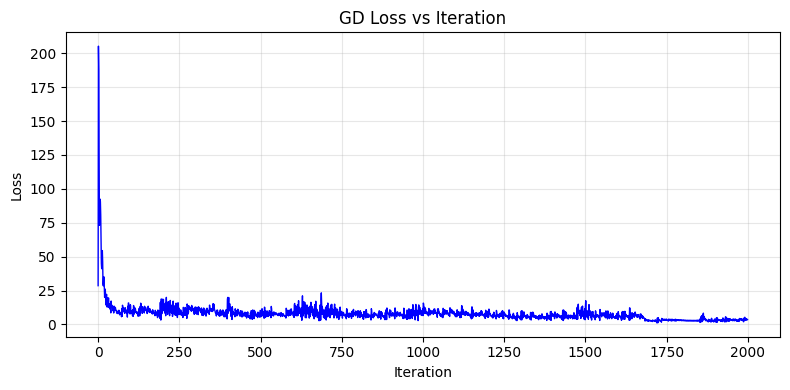

Loss decreased from 28.629272 to 3.572572
Total improvement: 87.52%
Running Neural Network...

--- Sample 4 (Index 245) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.875488
  Inefficiency: 0.999106
  Non-uniformity: 0.755542
Iteration 11/2000
  MSE Error: 4091.984131
  Inefficiency: 0.193101
  Non-uniformity: 0.006864
Iteration 21/2000
  MSE Error: 4091.981445
  Inefficiency: 0.191992
  Non-uniformity: 0.009676
Iteration 31/2000
  MSE Error: 4091.981201
  Inefficiency: 0.191703
  Non-uniformity: 0.010138
Iteration 41/2000
  MSE Error: 4091.980713
  Inefficiency: 0.191642
  Non-uniformity: 0.011184
Iteration 51/2000
  MSE Error: 4091.980469
  Inefficiency: 0.191620
  Non-uniformity: 0.011755
Iteration 61/2000
  MSE Error: 4091.980469
  Inefficiency: 0.191612
  Non-uniformity: 0.011983
Iteration 71/2000
  MSE Error: 4091.980469
  Inefficiency: 0.191610
  Non-uniformity: 0.012043
Iteration 81/2000
  MSE Error: 4091.980713
  Inefficiency: 0.191609
  Non-unif

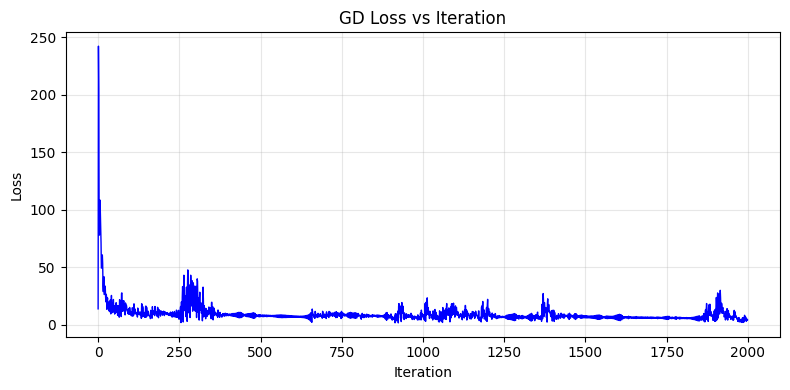

Loss decreased from 13.691423 to 3.975458
Total improvement: 70.96%
Running Neural Network...

--- Sample 5 (Index 223) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.836426
  Inefficiency: 0.998483
  Non-uniformity: 0.853099
Iteration 11/2000
  MSE Error: 4091.613281
  Inefficiency: 0.197185
  Non-uniformity: 0.033260
Iteration 21/2000
  MSE Error: 4091.612305
  Inefficiency: 0.197087
  Non-uniformity: 0.032532
Iteration 31/2000
  MSE Error: 4091.611816
  Inefficiency: 0.196983
  Non-uniformity: 0.031375
Iteration 41/2000
  MSE Error: 4091.612061
  Inefficiency: 0.196914
  Non-uniformity: 0.030031
Iteration 51/2000
  MSE Error: 4091.611816
  Inefficiency: 0.196870
  Non-uniformity: 0.029090
Iteration 61/2000
  MSE Error: 4091.611816
  Inefficiency: 0.196849
  Non-uniformity: 0.027863
Iteration 71/2000
  MSE Error: 4091.611328
  Inefficiency: 0.196788
  Non-uniformity: 0.025299
Iteration 81/2000
  MSE Error: 4091.610840
  Inefficiency: 0.196776
  Non-unif

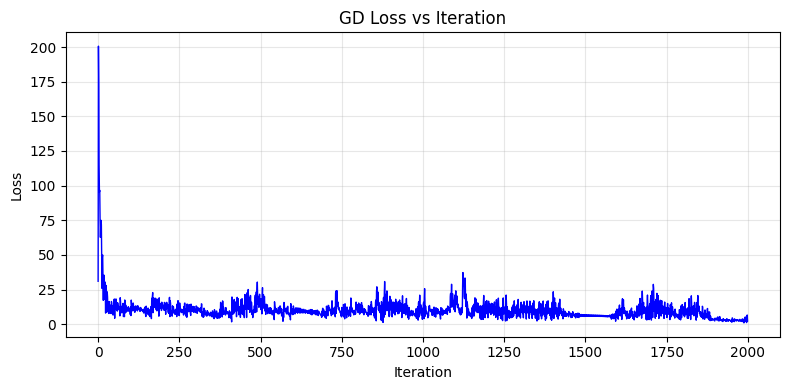

Loss decreased from 30.956264 to 2.252173
Total improvement: 92.72%
Running Neural Network...

--- Sample 6 (Index 31) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.832031
  Inefficiency: 0.999061
  Non-uniformity: 0.730866
Iteration 11/2000
  MSE Error: 4090.645020
  Inefficiency: 0.202471
  Non-uniformity: 0.019001
Iteration 21/2000
  MSE Error: 4090.643066
  Inefficiency: 0.202027
  Non-uniformity: 0.014618
Iteration 31/2000
  MSE Error: 4090.642090
  Inefficiency: 0.201709
  Non-uniformity: 0.010404
Iteration 41/2000
  MSE Error: 4090.640869
  Inefficiency: 0.201435
  Non-uniformity: 0.011765
Iteration 51/2000
  MSE Error: 4090.639648
  Inefficiency: 0.201171
  Non-uniformity: 0.010647
Iteration 61/2000
  MSE Error: 4090.639160
  Inefficiency: 0.201042
  Non-uniformity: 0.012374
Iteration 71/2000
  MSE Error: 4090.638916
  Inefficiency: 0.200929
  Non-uniformity: 0.014034
Iteration 81/2000
  MSE Error: 4090.638428
  Inefficiency: 0.200747
  Non-unifo

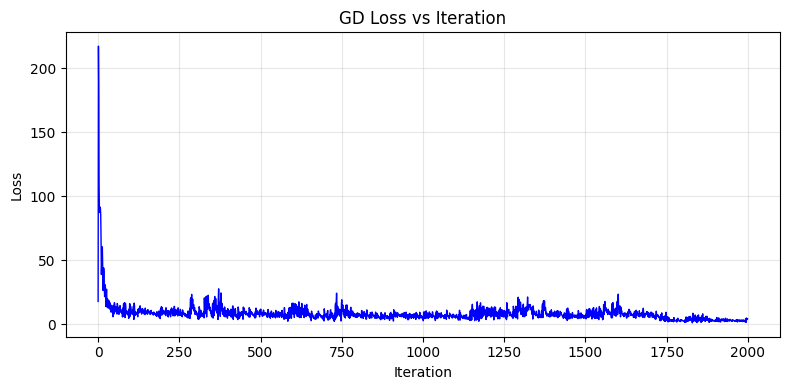

Loss decreased from 18.000467 to 4.438439
Total improvement: 75.34%
Running Neural Network...

--- Sample 7 (Index 559) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.835449
  Inefficiency: 0.998874
  Non-uniformity: 0.904374
Iteration 11/2000
  MSE Error: 4090.937500
  Inefficiency: 0.198326
  Non-uniformity: 0.019046
Iteration 21/2000
  MSE Error: 4090.932373
  Inefficiency: 0.196707
  Non-uniformity: 0.018511
Iteration 31/2000
  MSE Error: 4090.930908
  Inefficiency: 0.196170
  Non-uniformity: 0.016902
Iteration 41/2000
  MSE Error: 4090.928467
  Inefficiency: 0.195601
  Non-uniformity: 0.014227
Iteration 51/2000
  MSE Error: 4090.927734
  Inefficiency: 0.195127
  Non-uniformity: 0.015118
Iteration 61/2000
  MSE Error: 4090.926270
  Inefficiency: 0.194784
  Non-uniformity: 0.016481
Iteration 71/2000
  MSE Error: 4090.925293
  Inefficiency: 0.194545
  Non-uniformity: 0.016395
Iteration 81/2000
  MSE Error: 4090.924805
  Inefficiency: 0.194358
  Non-unif

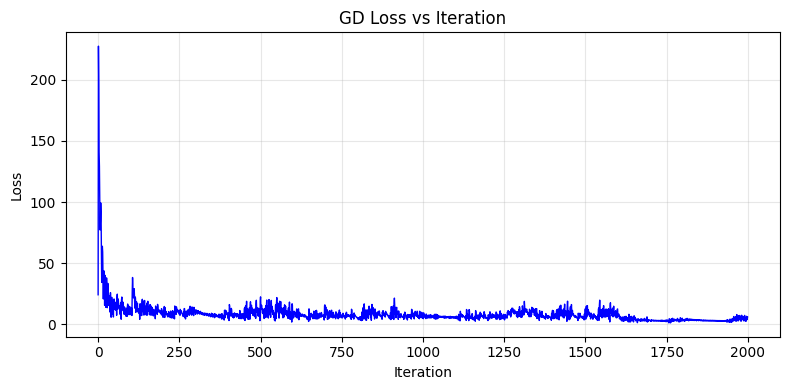

Loss decreased from 24.285954 to 6.039798
Total improvement: 75.13%
Running Neural Network...

--- Sample 8 (Index 516) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.781250
  Inefficiency: 0.998680
  Non-uniformity: 0.841778
Iteration 11/2000
  MSE Error: 4090.080078
  Inefficiency: 0.202604
  Non-uniformity: 0.024372
Iteration 21/2000
  MSE Error: 4090.075195
  Inefficiency: 0.201322
  Non-uniformity: 0.026267
Iteration 31/2000
  MSE Error: 4090.072998
  Inefficiency: 0.200602
  Non-uniformity: 0.025280
Iteration 41/2000
  MSE Error: 4090.070801
  Inefficiency: 0.200099
  Non-uniformity: 0.027465
Iteration 51/2000
  MSE Error: 4090.069824
  Inefficiency: 0.199733
  Non-uniformity: 0.029488
Iteration 61/2000
  MSE Error: 4090.069092
  Inefficiency: 0.199654
  Non-uniformity: 0.028845
Iteration 71/2000
  MSE Error: 4090.069092
  Inefficiency: 0.199616
  Non-uniformity: 0.028693
Iteration 81/2000
  MSE Error: 4090.069092
  Inefficiency: 0.199547
  Non-unif

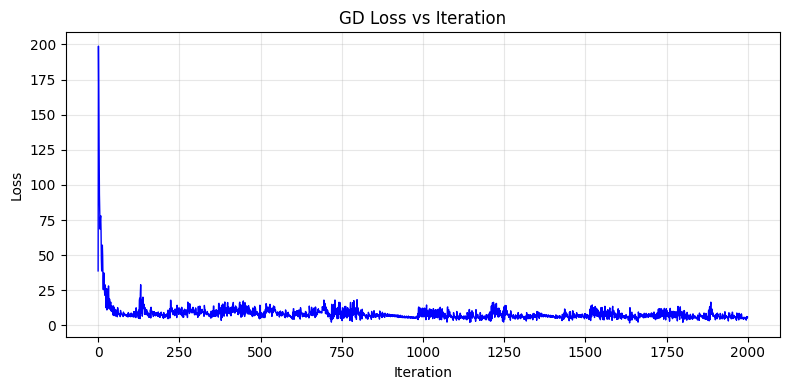

Loss decreased from 38.810055 to 5.966931
Total improvement: 84.63%
Running Neural Network...

--- Sample 9 (Index 537) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.818848
  Inefficiency: 0.997856
  Non-uniformity: 1.350706
Iteration 11/2000
  MSE Error: 4091.609863
  Inefficiency: 0.196336
  Non-uniformity: 0.015274
Iteration 21/2000
  MSE Error: 4091.609131
  Inefficiency: 0.195965
  Non-uniformity: 0.017631
Iteration 31/2000
  MSE Error: 4091.608154
  Inefficiency: 0.195778
  Non-uniformity: 0.018422
Iteration 41/2000
  MSE Error: 4091.608398
  Inefficiency: 0.195708
  Non-uniformity: 0.019287
Iteration 51/2000
  MSE Error: 4091.608398
  Inefficiency: 0.195683
  Non-uniformity: 0.019573
Iteration 61/2000
  MSE Error: 4091.608643
  Inefficiency: 0.195672
  Non-uniformity: 0.019809
Iteration 71/2000
  MSE Error: 4091.608643
  Inefficiency: 0.195662
  Non-uniformity: 0.020076
Iteration 81/2000
  MSE Error: 4091.608643
  Inefficiency: 0.195650
  Non-unif

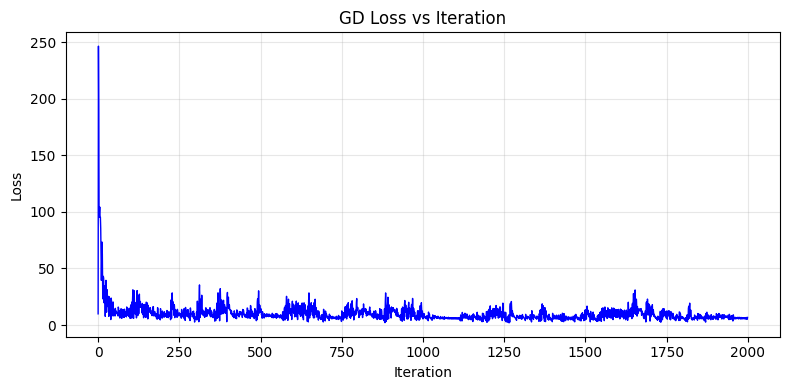

Loss decreased from 9.931926 to 6.731796
Total improvement: 32.22%
Running Neural Network...

--- Sample 10 (Index 675) ---
Running Gerchberg-Saxton (Standard)...
Iteration 1/2000
  MSE Error: 4095.696777
  Inefficiency: 0.996995
  Non-uniformity: 1.509906
Iteration 11/2000
  MSE Error: 4089.834717
  Inefficiency: 0.207177
  Non-uniformity: 0.018325
Iteration 21/2000
  MSE Error: 4089.827637
  Inefficiency: 0.205367
  Non-uniformity: 0.019608
Iteration 31/2000
  MSE Error: 4089.822266
  Inefficiency: 0.203964
  Non-uniformity: 0.023382
Iteration 41/2000
  MSE Error: 4089.819824
  Inefficiency: 0.203235
  Non-uniformity: 0.025753
Iteration 51/2000
  MSE Error: 4089.816650
  Inefficiency: 0.202455
  Non-uniformity: 0.025720
Iteration 61/2000
  MSE Error: 4089.815186
  Inefficiency: 0.202080
  Non-uniformity: 0.024506
Iteration 71/2000
  MSE Error: 4089.814209
  Inefficiency: 0.201909
  Non-uniformity: 0.023239
Iteration 81/2000
  MSE Error: 4089.813965
  Inefficiency: 0.201793
  Non-unif

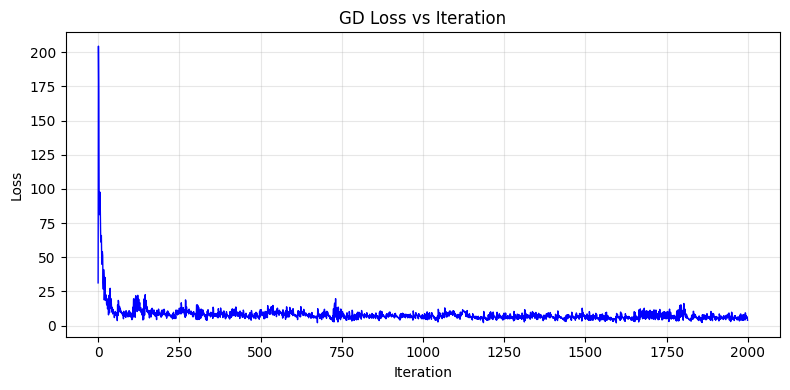

Loss decreased from 31.265417 to 3.923594
Total improvement: 87.45%
Running Neural Network...


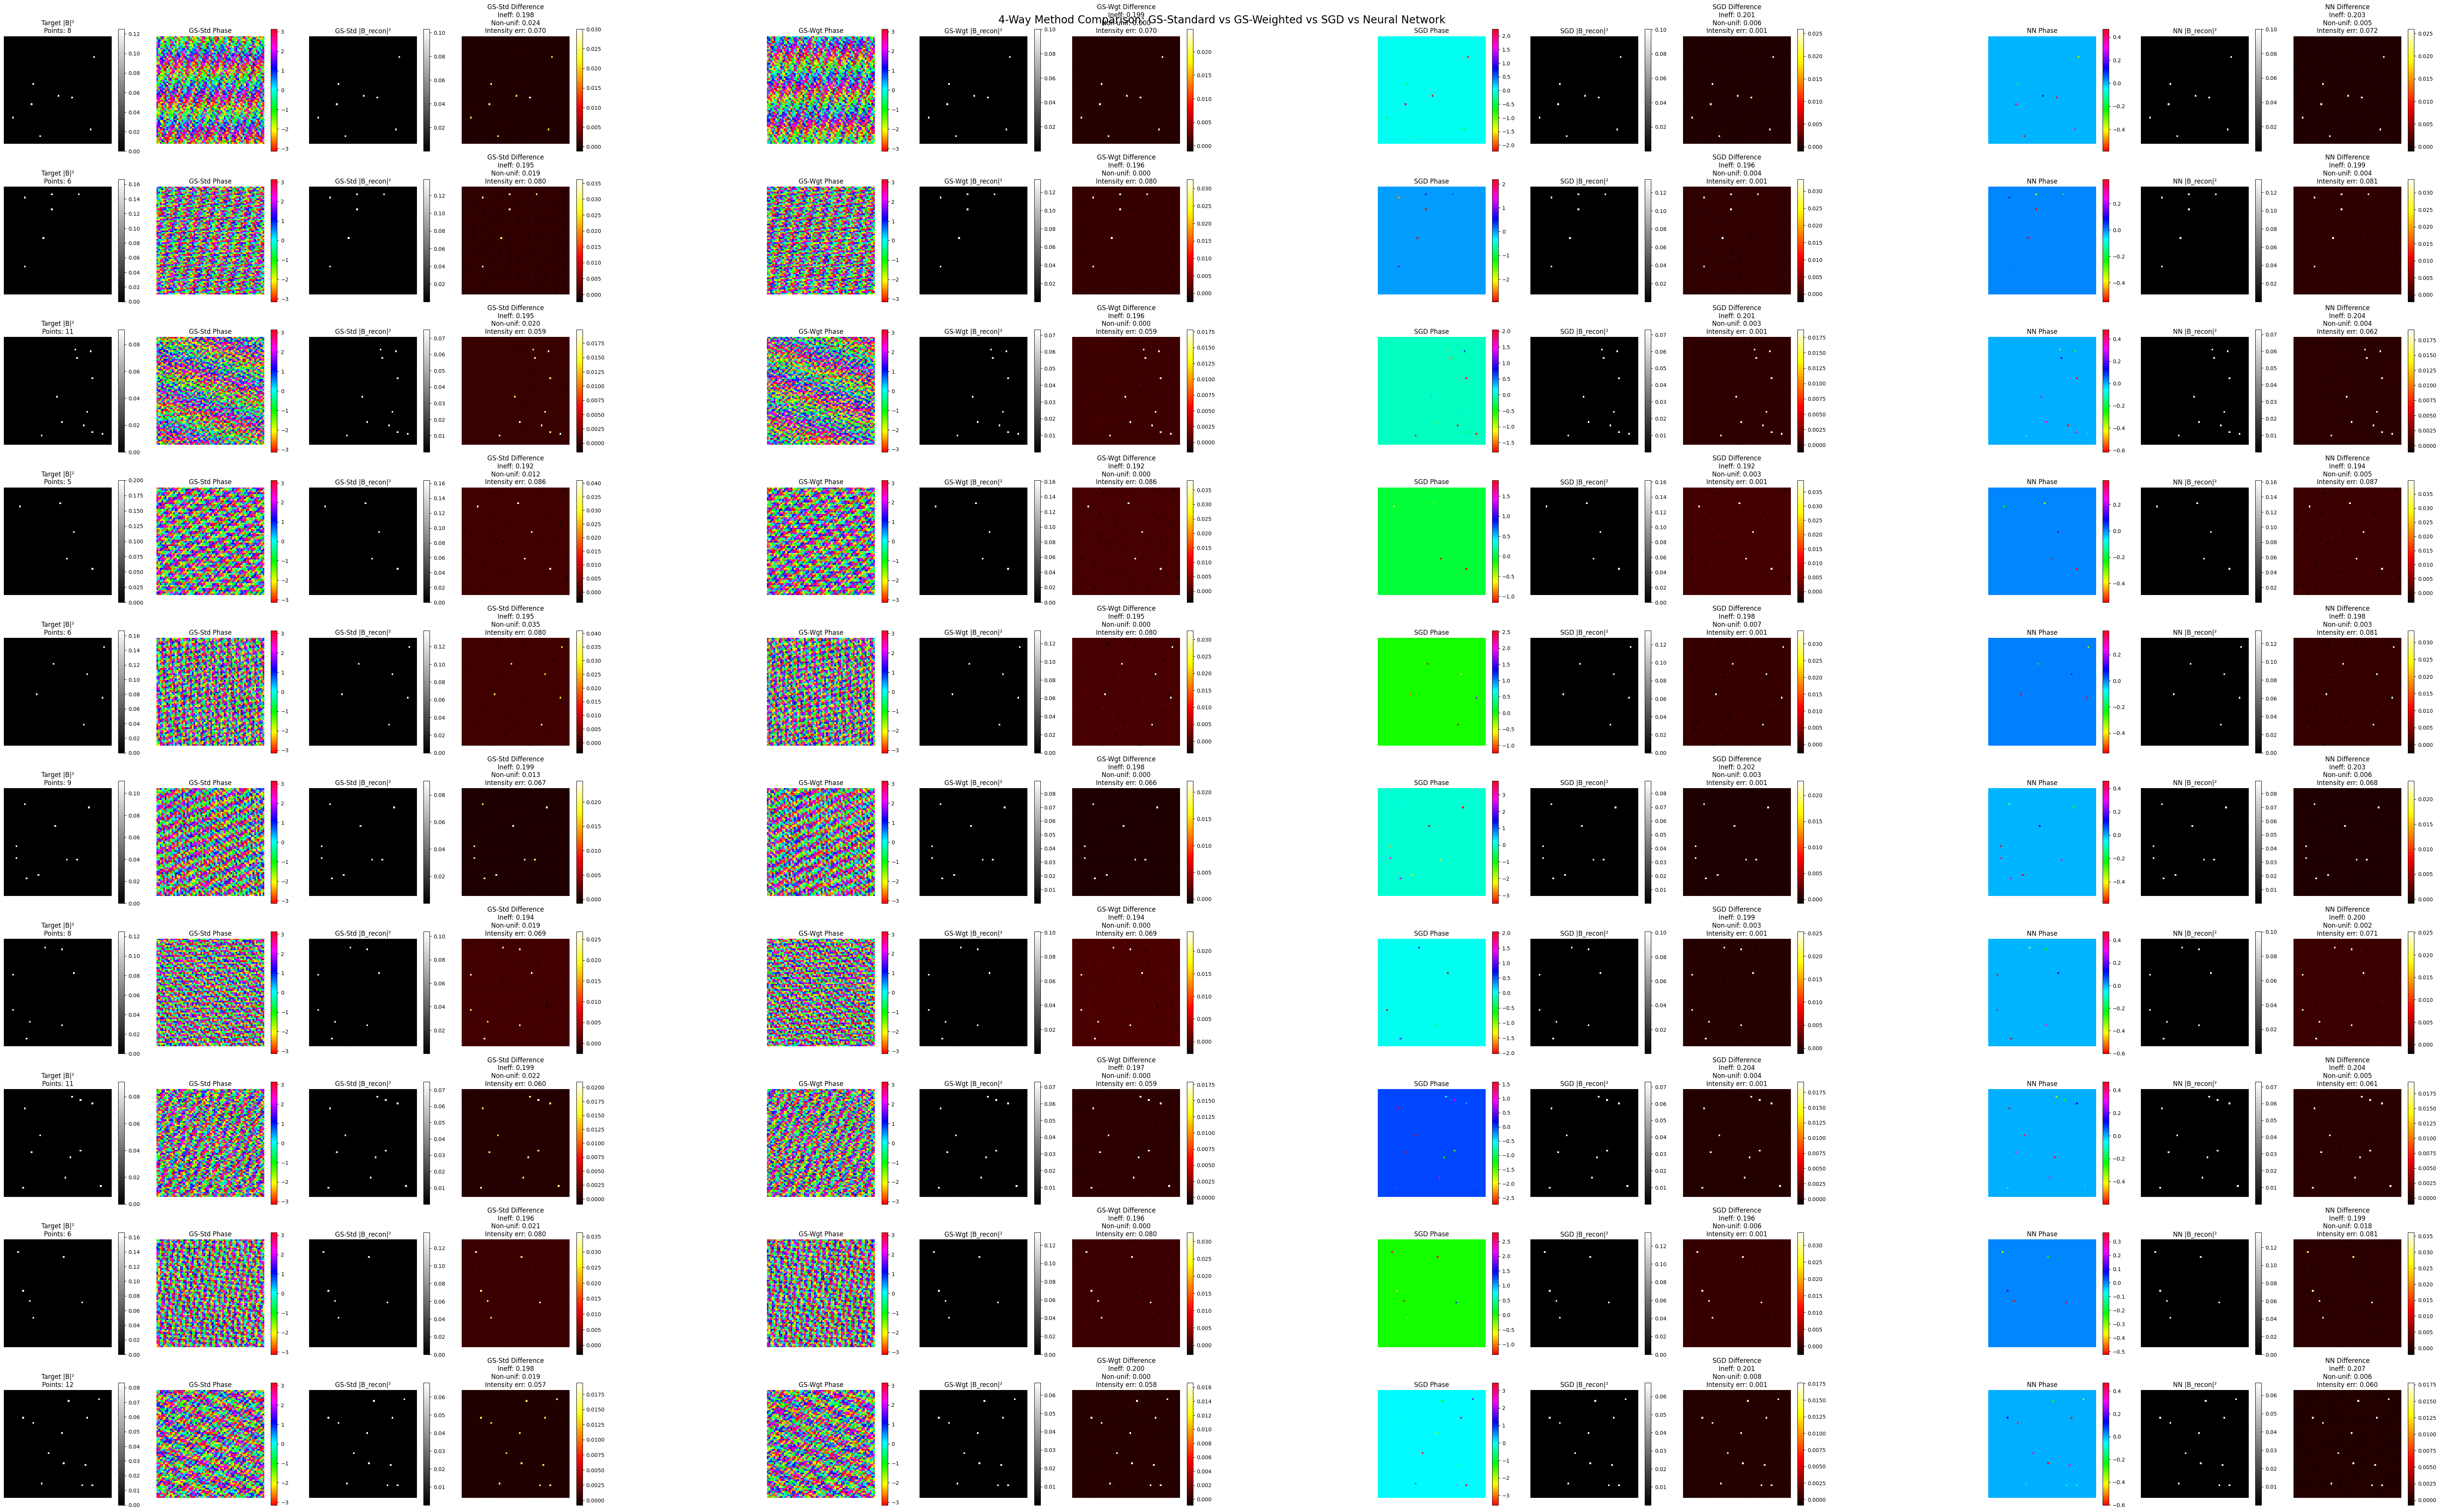


4-WAY METHOD COMPARISON SUMMARY

GS-Standard (Average over 10 samples):
  Inefficiency:    0.1962
  Non-uniformity:  0.0204
  Intensity error: 0.0708
  Reconstruction time: 2.4377 seconds

GS-Weighted (Average over 10 samples):
  Inefficiency:    0.1962
  Non-uniformity:  0.0000
  Intensity error: 0.0706
  Reconstruction time: 1.3509 seconds

SGD (Average over 10 samples):
  Inefficiency:    0.1992
  Non-uniformity:  0.0047
  Intensity error: 0.0011
  Reconstruction time: 16.3913 seconds

NN (Average over 10 samples):
  Inefficiency:    0.2012
  Non-uniformity:  0.0059
  Intensity error: 0.0724
  Reconstruction time: 0.0572 seconds

DETAILED PER-SAMPLE COMPARISON
Sample   Method     Points Ineff    Non-unif Intensity err Time (s)
----------------------------------------------------------------------
Sample 1  GS-Standard 8      0.198    0.024    0.070    2.2591  
Sample 1  GS-Weighted 8      0.199    0.000    0.070    1.4945  
Sample 1  SGD      8      0.201    0.006    0.001    18.27

In [7]:
from vanillanet.compare import compare_all_methods, print_comparison_summary

# Make sure you have your model trained and dataset ready
print("Starting comprehensive 4-way comparison of all methods...")

# Run the comprehensive comparison
comparison_results = compare_all_methods(
    dataset=dataset,
    model=model,
    device=device,
    num_samples=10,
    save_path='images/all_methods_comparison.png'
)

print("\n4-way comparison complete! Results:")
print_comparison_summary(comparison_results)

print("\nSaved visualization to 'images/all_methods_comparison.png'")